About the dataset:

1) step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. 

2) type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

3) amount - amount of the transaction in local currency.

4) nameOrig - customer who started the transaction

5) oldbalanceOrg - initial balance before the transaction

6) newbalanceOrig - new balance after the transaction

7) nameDest - customer who is the recipient of the transaction

8) oldbalanceDest - initial balance recipient before the transaction.

9) newbalanceDest - new balance recipient after the transaction. 
10) isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

11) isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

GOAL: Identify the fraudlent transaction is possible.

Importing libraris

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
#reading data
data = pd.read_csv("Fraud.csv")
data.shape

(6362620, 11)

The dataset has 6M rows and 11 columns.

In [3]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


Lets look for null values in the dataset

In [5]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# cehck for misiing values
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()],axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count',ascending = False)

,count,%
step,0,0.0
type,0,0.0
amount,0,0.0
nameOrig,0,0.0
oldbalanceOrg,0,0.0
newbalanceOrig,0,0.0
nameDest,0,0.0
oldbalanceDest,0,0.0
newbalanceDest,0,0.0
isFraud,0,0.0


As per the count per column, we have no null values.

In [7]:
#check for duplicates
data.duplicated().values.any()

False

No duplicates are found.

Lets explore variables 
1. type

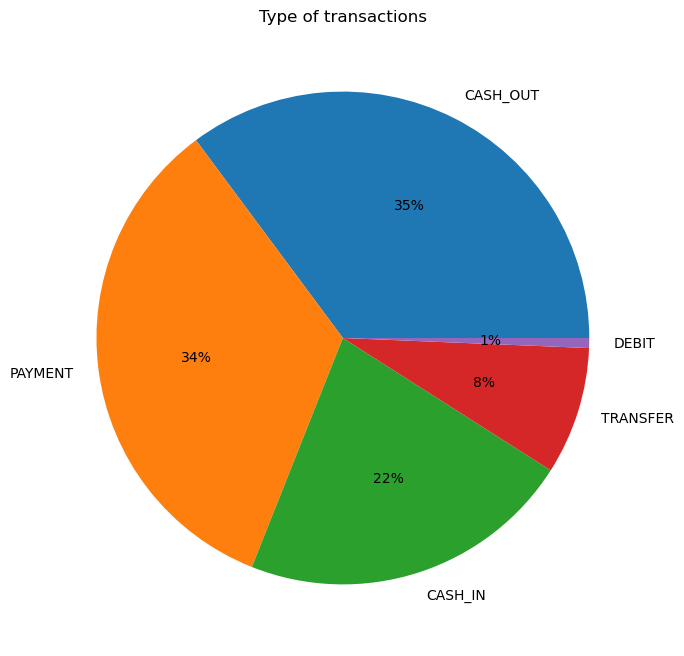

In [8]:
# checking various types of transactions in our dataset
plt.figure(figsize=(10,8))
plt.pie(data.type.value_counts().values,labels=data.type.value_counts().index,  autopct='%.0f%%')
plt.title("Type of transactions")
plt.show()

Most of the transactions are Cash_out followed by Payment,CASH_IN,Transfer and Debit the least.


<AxesSubplot:>

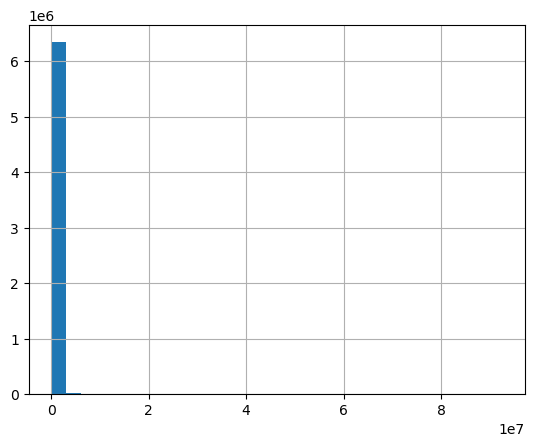

In [9]:
data['amount'].hist(bins=30)


Lets explore the isFraud variable which is our target variable.

In [10]:

print("Total fraud transactions are ",len(data[data['isFraud'] == 1]))

Total fraud transactions are  8213


In [11]:

print("Total non fraud(valid) transactions are ",len(data[data['isFraud'] == 0]))

Total non fraud(valid) transactions are  6354407


Fraudulent transactions do not happen regularly, so it is no surprise that we have a heavily imbalanced dataset on our hands.From the value count we see  only 8213 fraudulent cases (0.13%) out of the 600+ transactions.
We need to see how to handle the imbalance part for the data.
Preprocessing step we will use some technique to handle this.



In [12]:
#to find the type of fraud transactions
valid_transactions = data[data['isFraud'] == 0]
fraud_transactions = data[data['isFraud'] == 1]
fraud_type = list(fraud_transactions.type.drop_duplicates().values)
print('Types of transactions that have Frauds: ',fraud_type)

Types of transactions that have Frauds:  ['TRANSFER', 'CASH_OUT']


In [13]:
d =fraud_transactions.groupby('type').sum()
d


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,
CASH_OUT,1513537,5.989202e+09,5.984125e+09,2.987676e+05,4.465524e+09,1.049393e+10,4116,0
TRANSFER,1512246,6.067213e+09,7.564595e+09,1.579822e+09,4.397652e+06,1.631184e+07,4097,16


Text(0, 0.5, 'Type of tranactions')

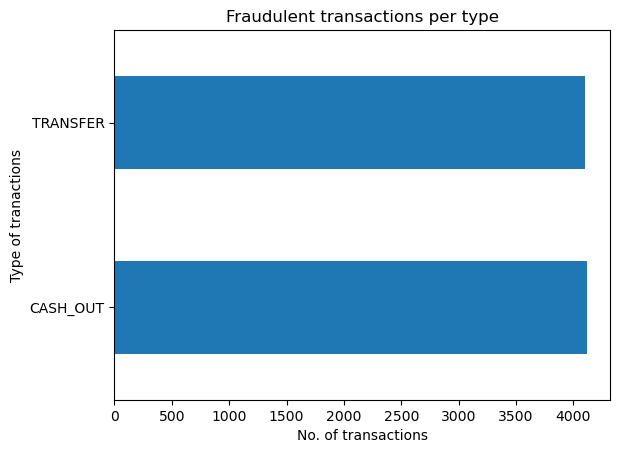

In [14]:
# plotting for types of fraud data
d['isFraud'].plot.barh()
plt.title("Fraudulent transactions per type")
plt.xlabel("No. of transactions")
plt.ylabel("Type of tranactions")

Almost same amount of fraudulent transactions are there in type transfer and type cash_out.

In [15]:
# check the fraud data
fraud_transactions.sort_values(['step', 'type'], ascending=[True, True]).head(30)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
1116,1,CASH_OUT,35063.63,C1635772897,35063.63,0.0,C1983025922,31140.00,7550.03,1,0
1870,1,CASH_OUT,25071.46,C1275464847,25071.46,0.0,C1364913072,9083.76,34155.22,1,0
1911,1,CASH_OUT,132842.64,C13692003,4499.08,0.0,C297927961,0.00,132842.64,1,0
2302,1,CASH_OUT,235238.66,C1499825229,235238.66,0.0,C2100440237,0.00,235238.66,1,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0


 Looks like someone transfer the cash and then the reciepient withdraw the cash, but the feature nameOrig and nameDest does not tell who is drawing and who is the sender and reciepient since the ID is different.

The feature newbalanceOrig is 0 for most of fraud columns. Also we can see a pattern  type, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest there are some connections. 

TRANSFER type, if type is transfer the oldbalanceDest and newbalanceDest mostly 0. Second, the amount of transfer is mostly equal to oldbalanceOrg and the newbalanceOrig is 0.

Next, lets make a plot to get a visualization.

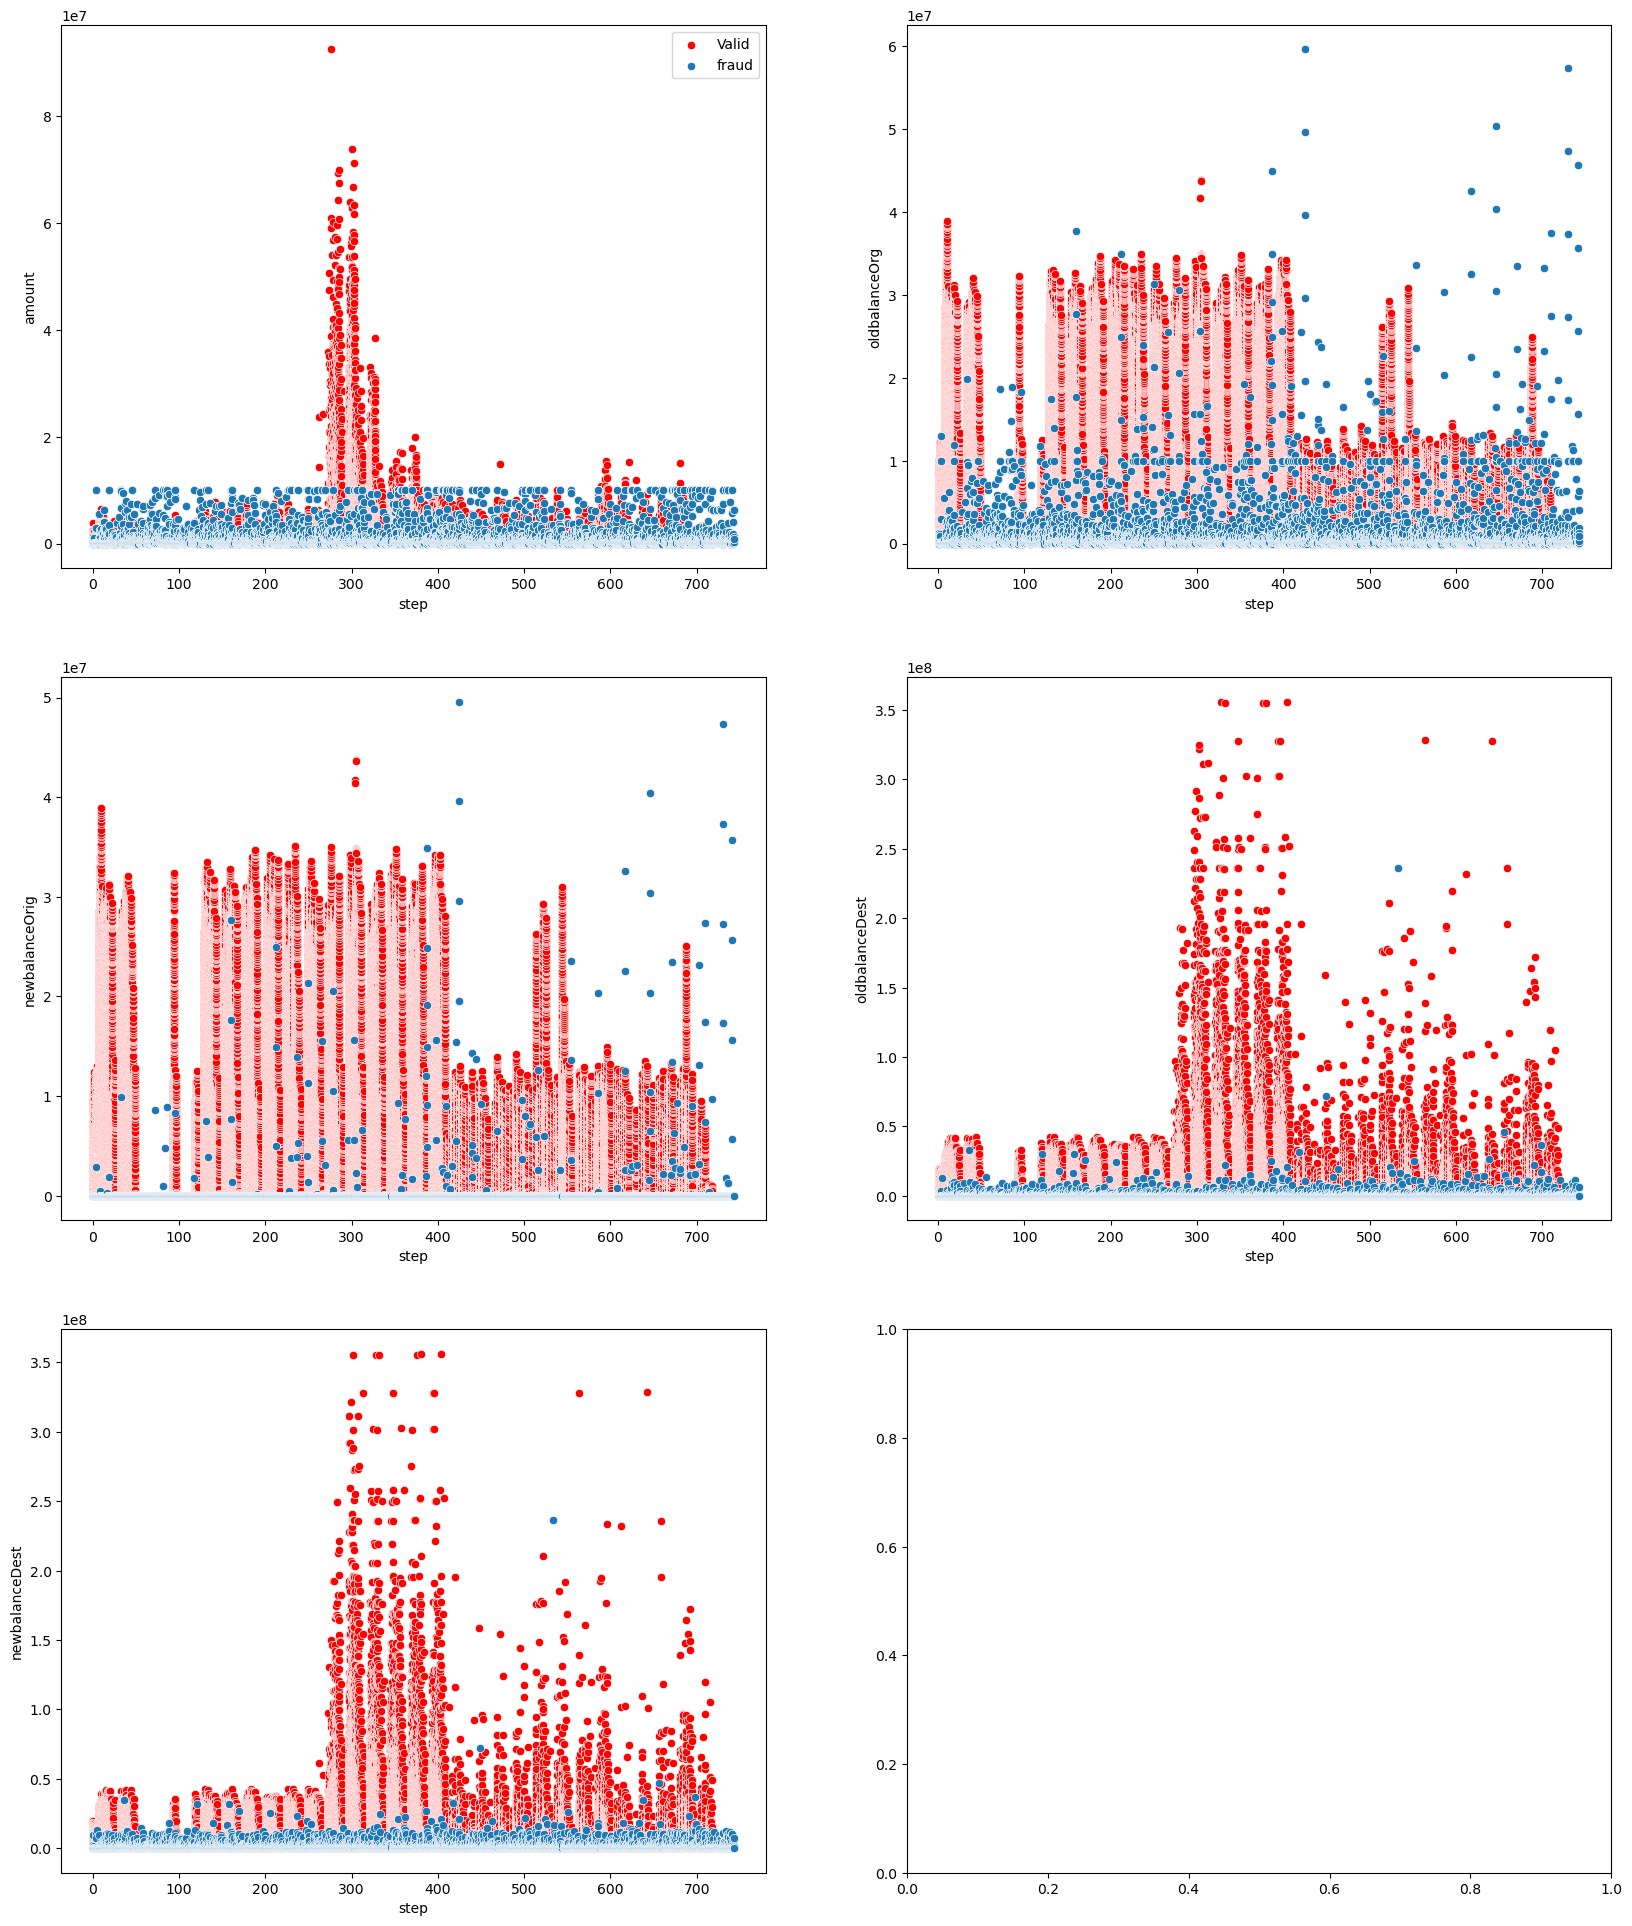

In [16]:
#plotting to see fraud and valid transactions vs features
fig, axes = plt.subplots(3, 2, figsize=(20, 24))

ax = axes.ravel()
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for i, feature in enumerate(features):
    sns.scatterplot(valid_transactions['step'], valid_transactions[feature], c=['red'], ax=ax[i])
    sns.scatterplot(fraud_transactions['step'], fraud_transactions[feature], ax=ax[i])
    ax[0].legend(["Valid", "fraud"])

SUMMARY OF DATA WRANGLING :

For amount the transaction amount for fraud is not more than 1.5 while the valid data is  more. Second, oldbalanceOrg it looks similar to amount but there are many data that are scattered above the fraud boundary and also the valid. 
newbalanceOrig the plot looks like answering the previous hypotesis most of the fraud data have 0 value in it. Then, oldbalanceDest the value of fraud data is at the minimum level compare to the valid. Last, newbalanceDest similar looking like oldbalaceDest the data just at minimum level.

Categorical Features :- 
We have 3 categorical variables in our dataset
Type
nameOrig
nameDest

We need to convert them into numerical values to include them in analysis.

Only CASH-OUT and TRANSFER transactions can be fraudulent. So, it makes sense to retain only these two types of transactions in our dataset.



In [17]:
data = data.loc[(data.type == 'TRANSFER')|(data.type == 'CASH_OUT')]

__Exploratory Data Analysis__

We are not able to collect any important information from column isFlaggedFraud.
Dropping this column for further analysis.

In [18]:
drop = ['isFlaggedFraud']
data.drop(drop,axis=1,inplace=True)

In [19]:
data.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0


In [20]:
print("Number of transactions with amount is less 0?")
print(len(data[data.amount<0]))

print("Number of transactions with amount is equal to 0?")
print(len(data[data.amount==0]))

Number of transactions with amount is less 0?
0
Number of transactions with amount is equal to 0?
16


Fraud and non fraud transactions count by time step

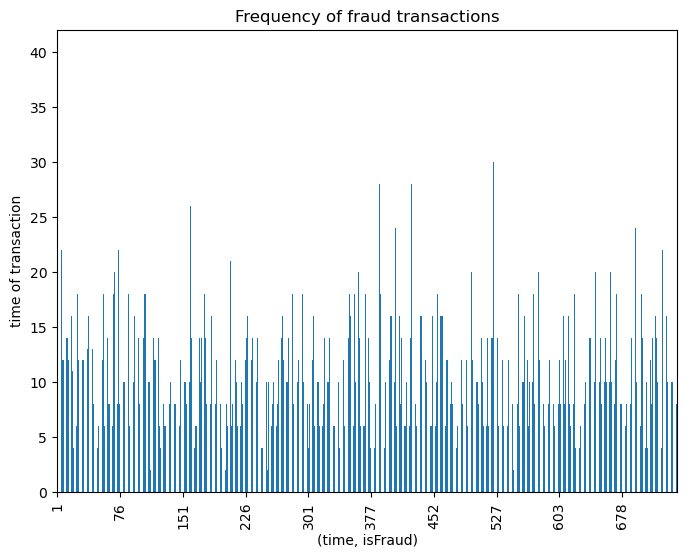

In [21]:
plt.figure(figsize=(8,6))
fraud = data['isFraud'].isin([1])

fraud_time = data[fraud].groupby(['step']).size().plot(kind='bar')
fraud_time.set_xlabel("(time, isFraud)")
fraud_time.set_ylabel("time of transaction")
plt.title("Frequency of fraud transactions")
plt.xticks(rotation=90,fontsize=10)
plt.locator_params(axis='x', nbins=10)
plt.show()

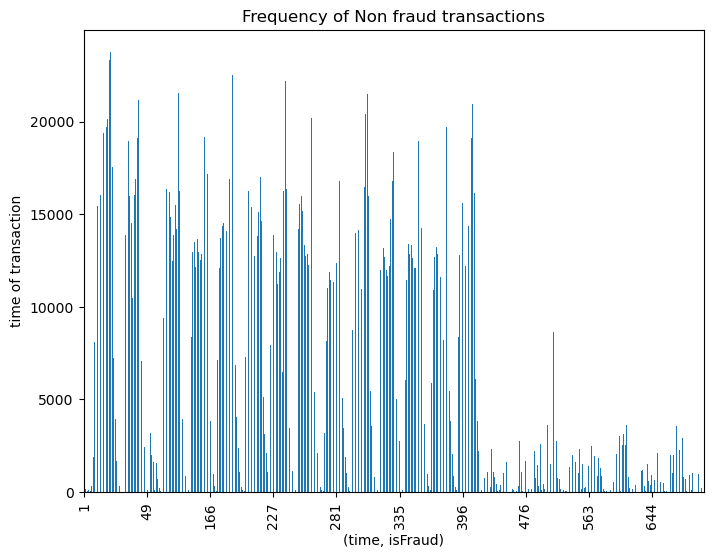

In [22]:
plt.figure(figsize=(8,6))
fraud = data['isFraud'].isin([0])

fraud_time = data[fraud].groupby(['step']).size().plot(kind='bar')
fraud_time.set_xlabel("(time, isFraud)")
fraud_time.set_ylabel("time of transaction")
plt.title("Frequency of Non fraud transactions")
plt.xticks(rotation=90,fontsize=10)
plt.locator_params(axis='x', nbins=10)
plt.show()

the fraud transactions are almost uniformly spread out across time steps, whereas non-fraudulent transactions are more concentrated in specific time steps. This could be a differentiator between the two categories and can help in the training of the classification models.

In [23]:
#Defining inaccuracies in originator and recipient balances
#data['origBalance_inacc'] = (data['oldbalanceOrg'] - data['amount']) - data['newbalanceOrig']
#data['destBalance_inacc'] = (data['oldbalanceDest'] + data['amount']) - data['newbalanceDest']

In [24]:
print("Are there any mismatch in the balance at origin and destination after transaction?")

data['origBalance_inacc'] = (data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"]).astype(int)
data['destBalance_inacc'] = (data["oldbalanceDest"] + data["amount"] != data["newbalanceDest"]).astype(int)

print("Balance Error(%) at the origin:",round(data['origBalance_inacc'].value_counts()[1]/data.shape[0] * 100,2))

print("Balance Error(%) at the destination:",round(data['destBalance_inacc'].value_counts()[1]/data.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the origin: 93.72
Balance Error(%) at the destination: 42.09


In [25]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,origBalance_inacc,destBalance_inacc
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,1,1
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,1,1
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,1,1


Let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

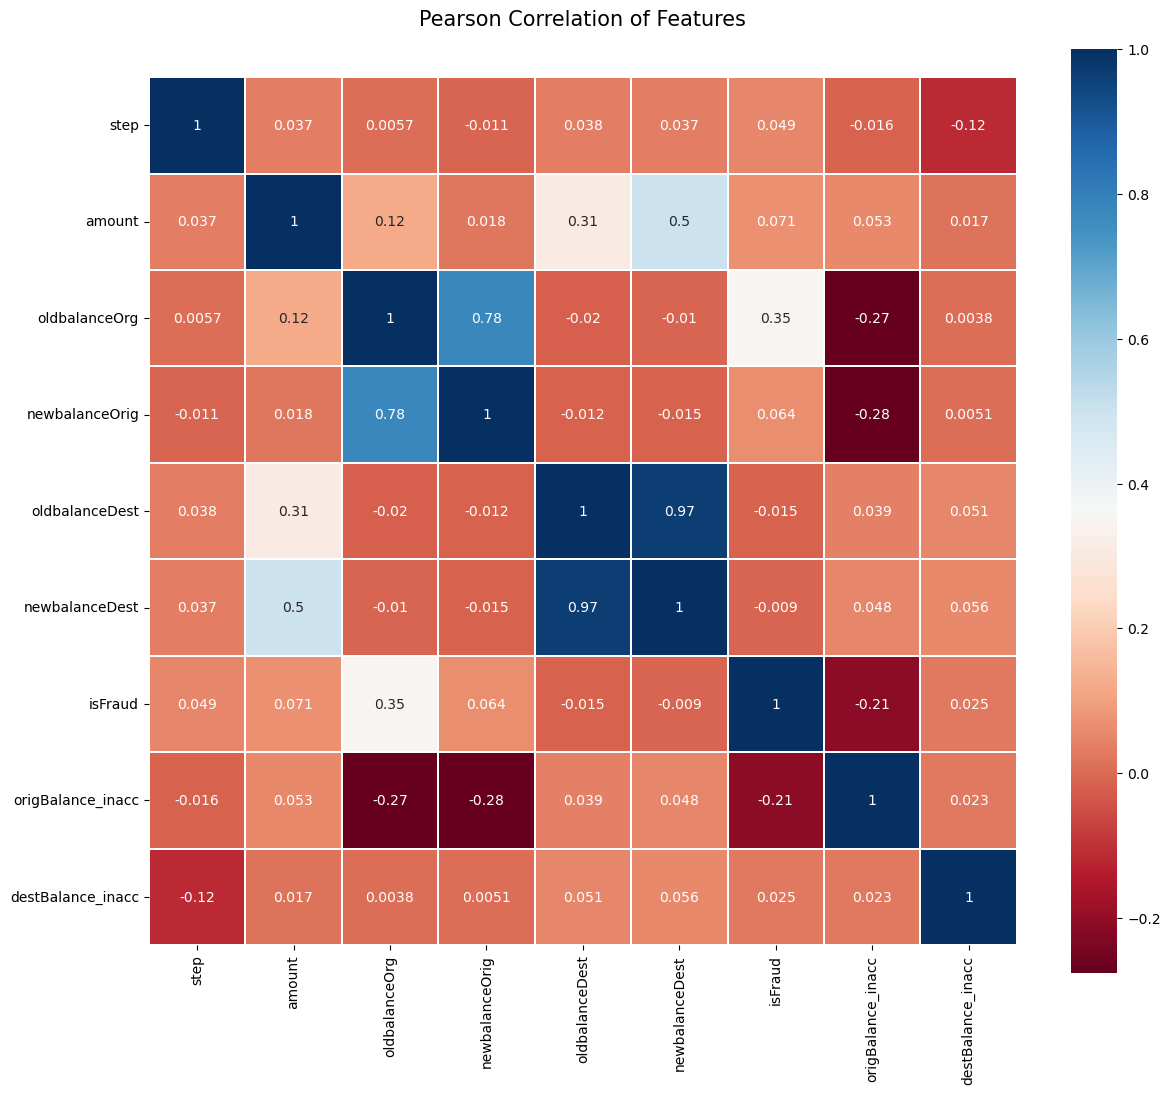

In [26]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Input features oldbalanceDest and newbalanceDest are correlated with each other so we had to drop one of the feature. To decide which one to drop amongst them we have to check their correlation with dependent feature (isFraud), oldbalanceDest is highly negatively correlated (-0.0059) with target feature than newbalanceDest (0.00054).

Also oldbalanceOrig and newbalanceOrig are also correlated with each other and newbalanceOrig is highly negatively correlated (-0.0081) with target feature than oldbalanceOrg (0.01). 
We will be considering dropping oldbalanceOrg and newbalanceDest feature.

In [27]:
#data[data['type']=='PAYMENT'].describe()['amount']['mean']

In [28]:
data[data['type']=='TRANSFER'].describe()['amount']['mean']


910647.0096454779

In [29]:
data[data['type']=='CASH_OUT'].describe()['amount']['mean']

176273.96434613984

In [30]:
#data[data['type']=='CASH_IN'].describe()['amount']['mean']


Transfer has the largest mean value of amount followed by considerably less Cashout.

__DATA PREPROCESSING AND TRAINING:__

In [31]:
ss = StandardScaler()

data.amount         = ss.fit_transform(data[['amount']])
data.oldbalanceOrg  = ss.fit_transform(data[['oldbalanceOrg']])
data.oldbalanceDest = ss.fit_transform(data[['oldbalanceDest']])
data.newbalanceOrig = ss.fit_transform(data[['newbalanceOrig']])
data.newbalanceDest = ss.fit_transform(data[['newbalanceDest']])
#data.origBalance_inacc = ss.fit_transform(data[['origBalance_inacc']])
#data.destBalance_inacc = ss.fit_transform(data[['destBalance_inacc']])

In [32]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,origBalance_inacc,destBalance_inacc
2,1,TRANSFER,-0.357467,C1305486145,-0.188847,-0.106389,C553264065,-0.403155,-0.438259,1,0,1
3,1,CASH_OUT,-0.357467,C840083671,-0.188847,-0.106389,C38997010,-0.398142,-0.438259,1,0,1
15,1,CASH_OUT,-0.099576,C905080434,-0.128591,-0.106389,C476402209,-0.401952,-0.427245,0,1,1
19,1,TRANSFER,-0.115146,C1670993182,-0.186762,-0.106389,C1100439041,-0.397848,-0.438259,0,1,1
24,1,TRANSFER,-0.006590,C1984094095,-0.146456,-0.106389,C932583850,-0.401672,0.143134,0,1,1


In [33]:
# performing label encoding on type,nameOrig and nameDest
label = LabelEncoder()
#data['type']=label.fit_transform(data.type)
data['nameOrig']=label.fit_transform(data.nameOrig)
data['nameDest']=label.fit_transform(data.nameDest)

In [34]:
data_clean = pd.get_dummies(data, columns = ['type'])

In [35]:
data_clean.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,origBalance_inacc,destBalance_inacc,type_CASH_OUT,type_TRANSFER
2,1,-0.357467,436008,-0.188847,-0.106389,391672,-0.403155,-0.438259,1,0,1,0,1
3,1,-0.357467,2539295,-0.188847,-0.106389,348886,-0.398142,-0.438259,1,0,1,1,0
15,1,-0.099576,2632251,-0.128591,-0.106389,371535,-0.401952,-0.427245,0,1,1,1,0
19,1,-0.115146,959849,-0.186762,-0.106389,26498,-0.397848,-0.438259,0,1,1,0,1
24,1,-0.006590,1408914,-0.146456,-0.106389,491969,-0.401672,0.143134,0,1,1,0,1


Applying the principal component analysis

In [36]:
data_pca = data_clean.copy()
t=data_pca['isFraud']
del data_pca['isFraud']
from sklearn.decomposition import PCA
# Loop Function to identify number of principal components that explain at least 85% of the variance
for comp in range(3, data_pca.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(data_pca)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(data_pca)
cluster_df=Final_PCA.transform(data_pca)
num_comps = comp_check.shape[0]
#print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum())

In [37]:
print ("Using " + str(final_comp) + " components , we can explain " + str (comp_check.sum()) + " of the variability in the original data.")

Using 3 components , we can explain 0.999999999991513 of the variability in the original data.


In [38]:
cluster_df

array([[ 9.48310093e+05, -1.36775450e+05, -2.40800668e+02],
       [-1.15497451e+06, -9.38716296e+04, -2.40821949e+02],
       [-1.24793178e+06, -1.16515422e+05, -2.40781414e+02],
       ...,
       [ 1.15206963e+06,  1.58477138e+05,  5.00698956e+02],
       [ 4.03044084e+05, -2.98239042e+04,  5.01032310e+02],
       [ 9.84368358e+05, -2.21303469e+05,  5.01342129e+02]])

In [39]:
principalDf = pd.DataFrame(data = cluster_df
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])


In [40]:
principalDf.reset_index(drop=True, inplace=True)

t.reset_index(drop=True, inplace=True)
finalDf = pd.concat([principalDf,t], axis = 1)


In [41]:
finalDf.head()

,principal component 1,principal component 2,principal component 3,isFraud
0,9.483101e+05,-136775.449937,-240.800668,1
1,-1.154975e+06,-93871.629618,-240.821949,1
2,-1.247932e+06,-116515.422442,-240.781414,0
3,4.244896e+05,228427.893630,-241.404378,0
4,-2.460152e+04,-237017.950246,-240.607527,0


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

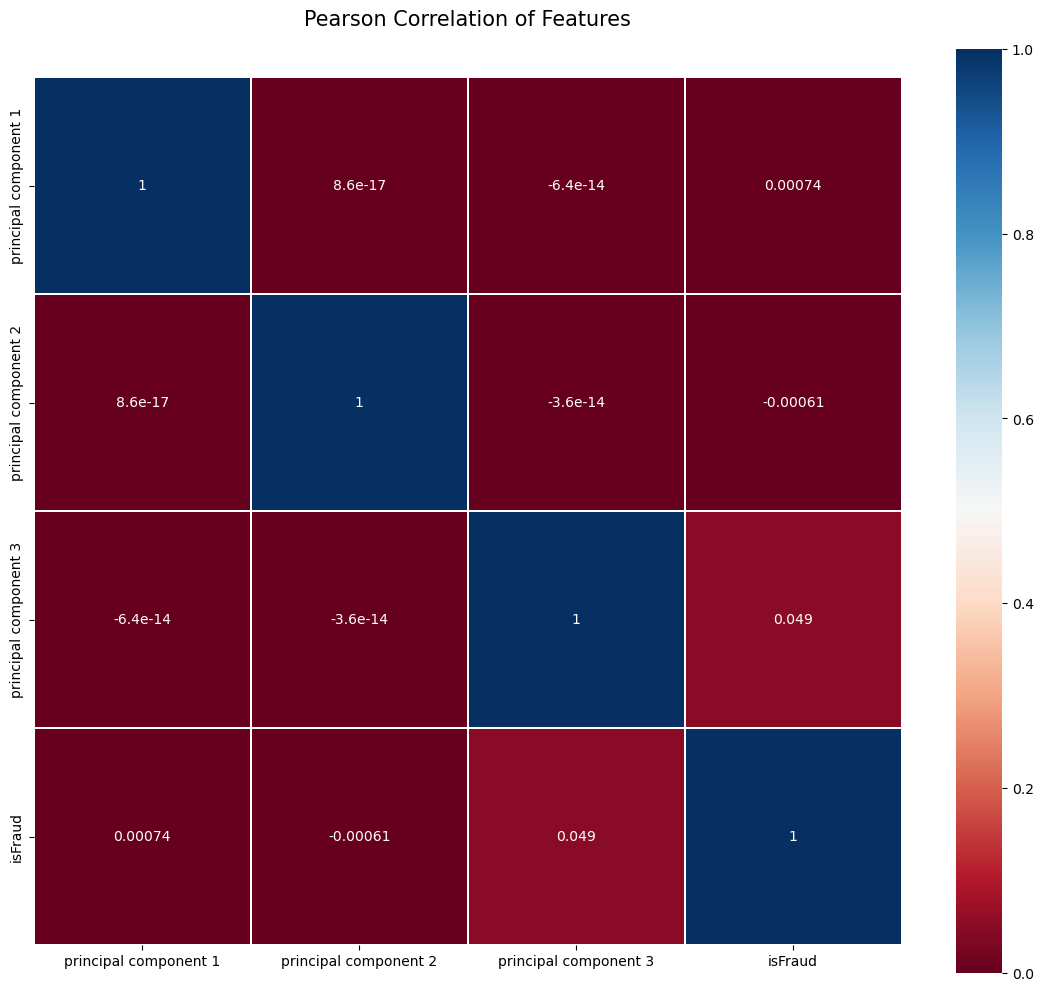

In [42]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(finalDf.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Although three component PCA analysis explains a lot of variabilities(99%) between the various features, but it still cannot generate high corelations with the target variable isfraud.

Splitting of training and test data sets

In [43]:
# preparing test and train data
from sklearn.model_selection import train_test_split


X = data_clean.drop(['newbalanceDest','oldbalanceOrg', 'isFraud'], axis=1)

y = data_clean['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
X_train.shape, X_test.shape

((1939286, 10), (831123, 10))

In [45]:
y_train.shape, y_test.shape

((1939286,), (831123,))

In [46]:
#Inspect final data features format
X_train.head()

,step,amount,nameOrig,newbalanceOrig,nameDest,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_CASH_OUT,type_TRANSFER
1147811,131,0.178902,829369,-0.106389,130559,0.923703,1,0,1,0
1726050,160,-0.049527,891052,-0.106389,2279,0.224101,1,0,1,0
4283299,307,-0.143771,420623,-0.106389,18903,-0.269969,1,1,1,0
564031,22,-0.342151,2663011,-0.106389,122145,-0.227073,1,1,1,0
2630554,209,-0.267970,509072,1.752077,152291,-0.369782,0,1,1,0


In [47]:
#save final training and testing
X_train.to_csv('data/Training_Data_Features.csv',index=False,index_label=False)
X_test.to_csv('data/Testing_Data_Features.csv',index=False,index_label=False)
y_train.to_csv('data/Training_Data_Labels.csv',index=False,index_label=False)
y_test.to_csv('data/Testing_Data_Labels.csv',index=False,index_label=False)

Summary of Data Preprocessing and training:

1. Huge differences in amount and oldbalance and newbalance columns can impact the model performance so we    standardized these variables using StandardScaler().

2. For the categorical variables in our data set we used one hot encoding for the 'type' feature and we used label encoder for the namesorg and namedest.

3. We performed PCA analysis using 3 principal components , Although three component PCA analysis explains a lot of variabilities(99%) between the various features, but it still cannot generate high corelations with the target variable isfraud.


5. As we discussed during EDA Input features oldbalanceDest and newbalanceDest are correlated with each other so we  decided  to drop oldbalanceDest as it is highly negatively correlated (-0.0059) with target feature than newbalanceDest (0.00054).
Also oldbalanceOrig and newbalanceOrig are also correlated with each other and newbalanceOrig is highly negatively correlated (-0.0081) with target feature than oldbalanceOrg (0.01).
We dropped newbalanceOrig and oldbalanceDest.

5. We splitted training and test data into 70-30 ratio.

We will be performing the modelling steps next